## 1. Importar librerias

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
 
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

## 2. Importar dataset

In [2]:
data_titanic=pd.read_csv('C:/Users/AlexP/Documents/workspace/ML/Laboratorios 9C/titanic.csv')

## 3. Analisis Exploratorio de los DATOS (DEA)

In [3]:
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<function matplotlib.pyplot.show(close=None, block=None)>

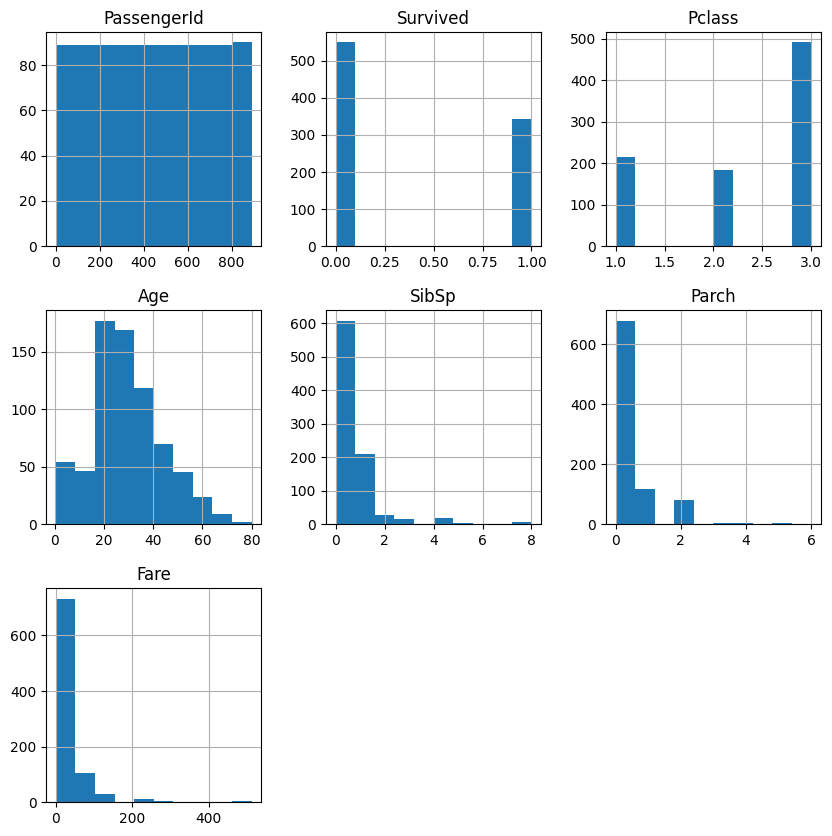

In [4]:
# Visualizar la distribucion de los datos en un histograma
data_titanic.hist(figsize=(10,10))
plt.show

In [5]:
# Mostrar el tamaño del data set
print('El tamaño del dataset es:',data_titanic.shape)

El tamaño del dataset es: (891, 12)


In [6]:
# Mostrar informacion general del dataset
data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Mostrar un resumen estadistico de cada uno de los columnas
data_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Mostrar un resumen estadistico con valores nulos
data_titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

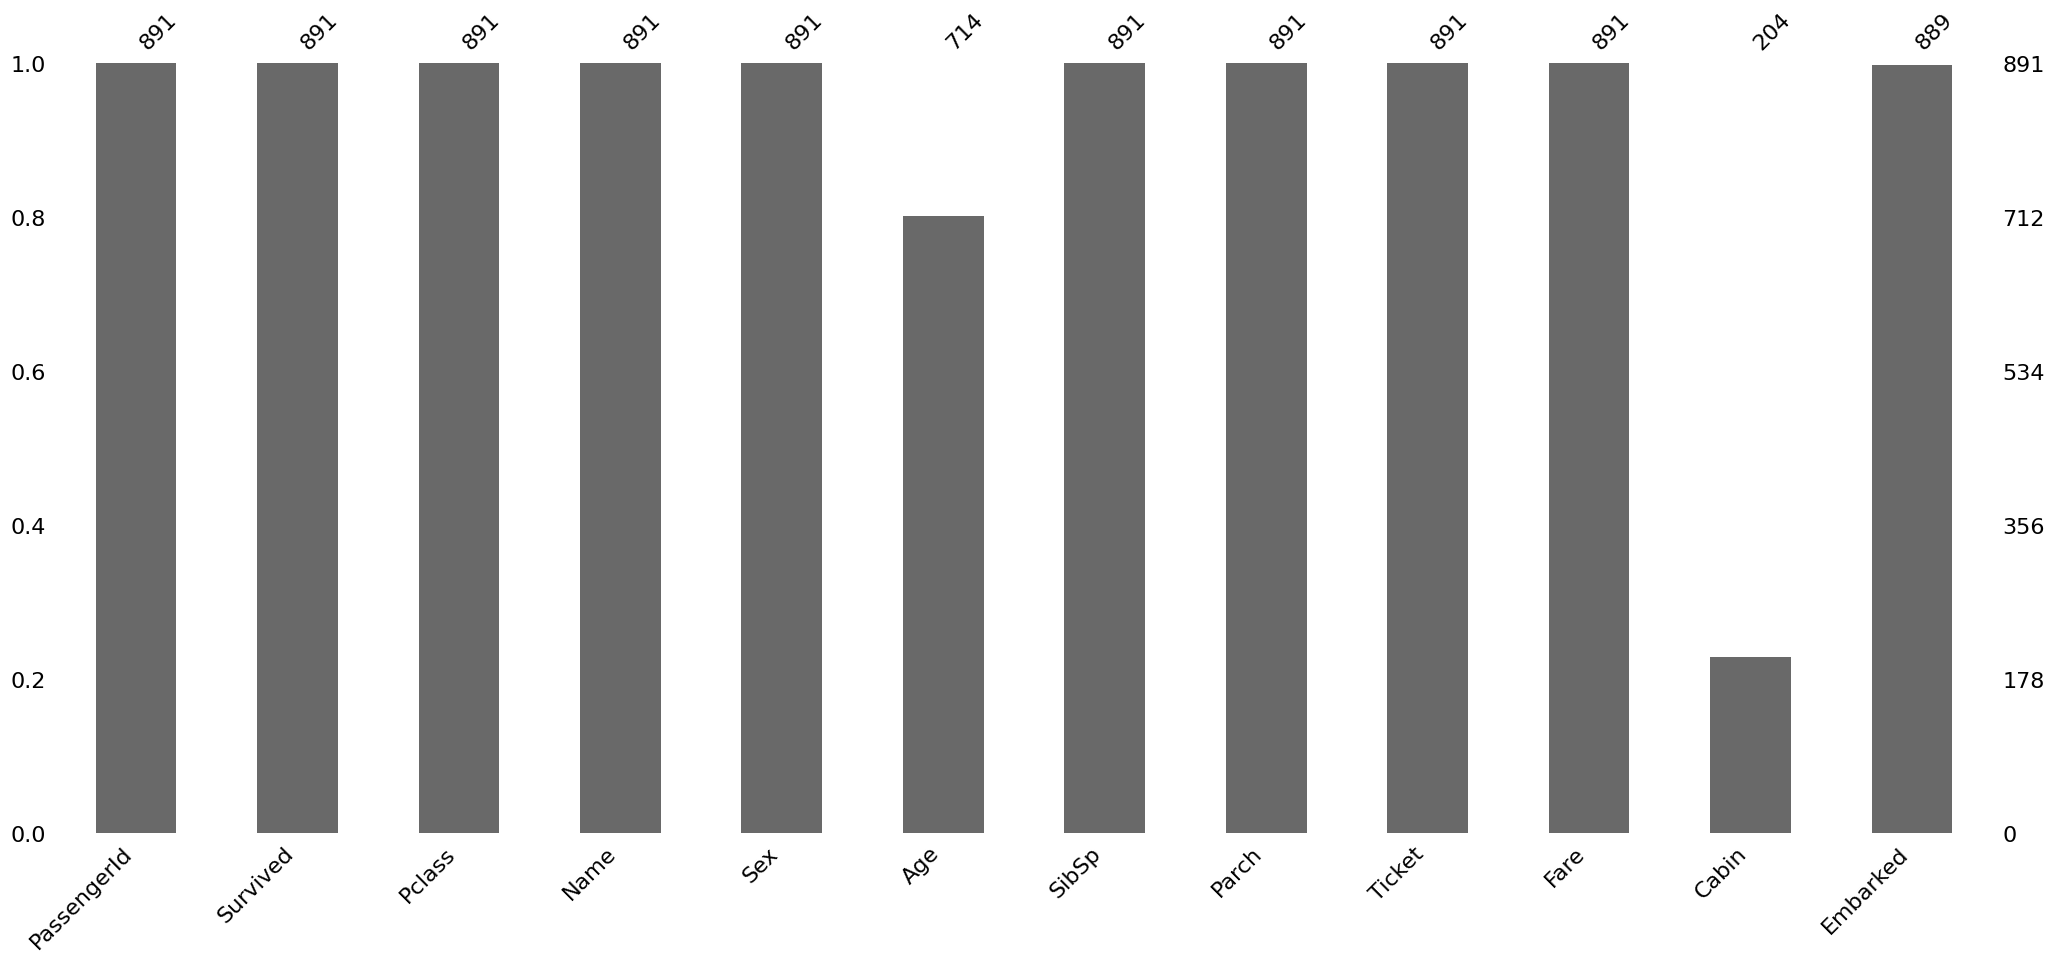

In [9]:
# Mostrar de forma grafica los valores faltantes de cada columna
msno.bar(data_titanic)

<Axes: >

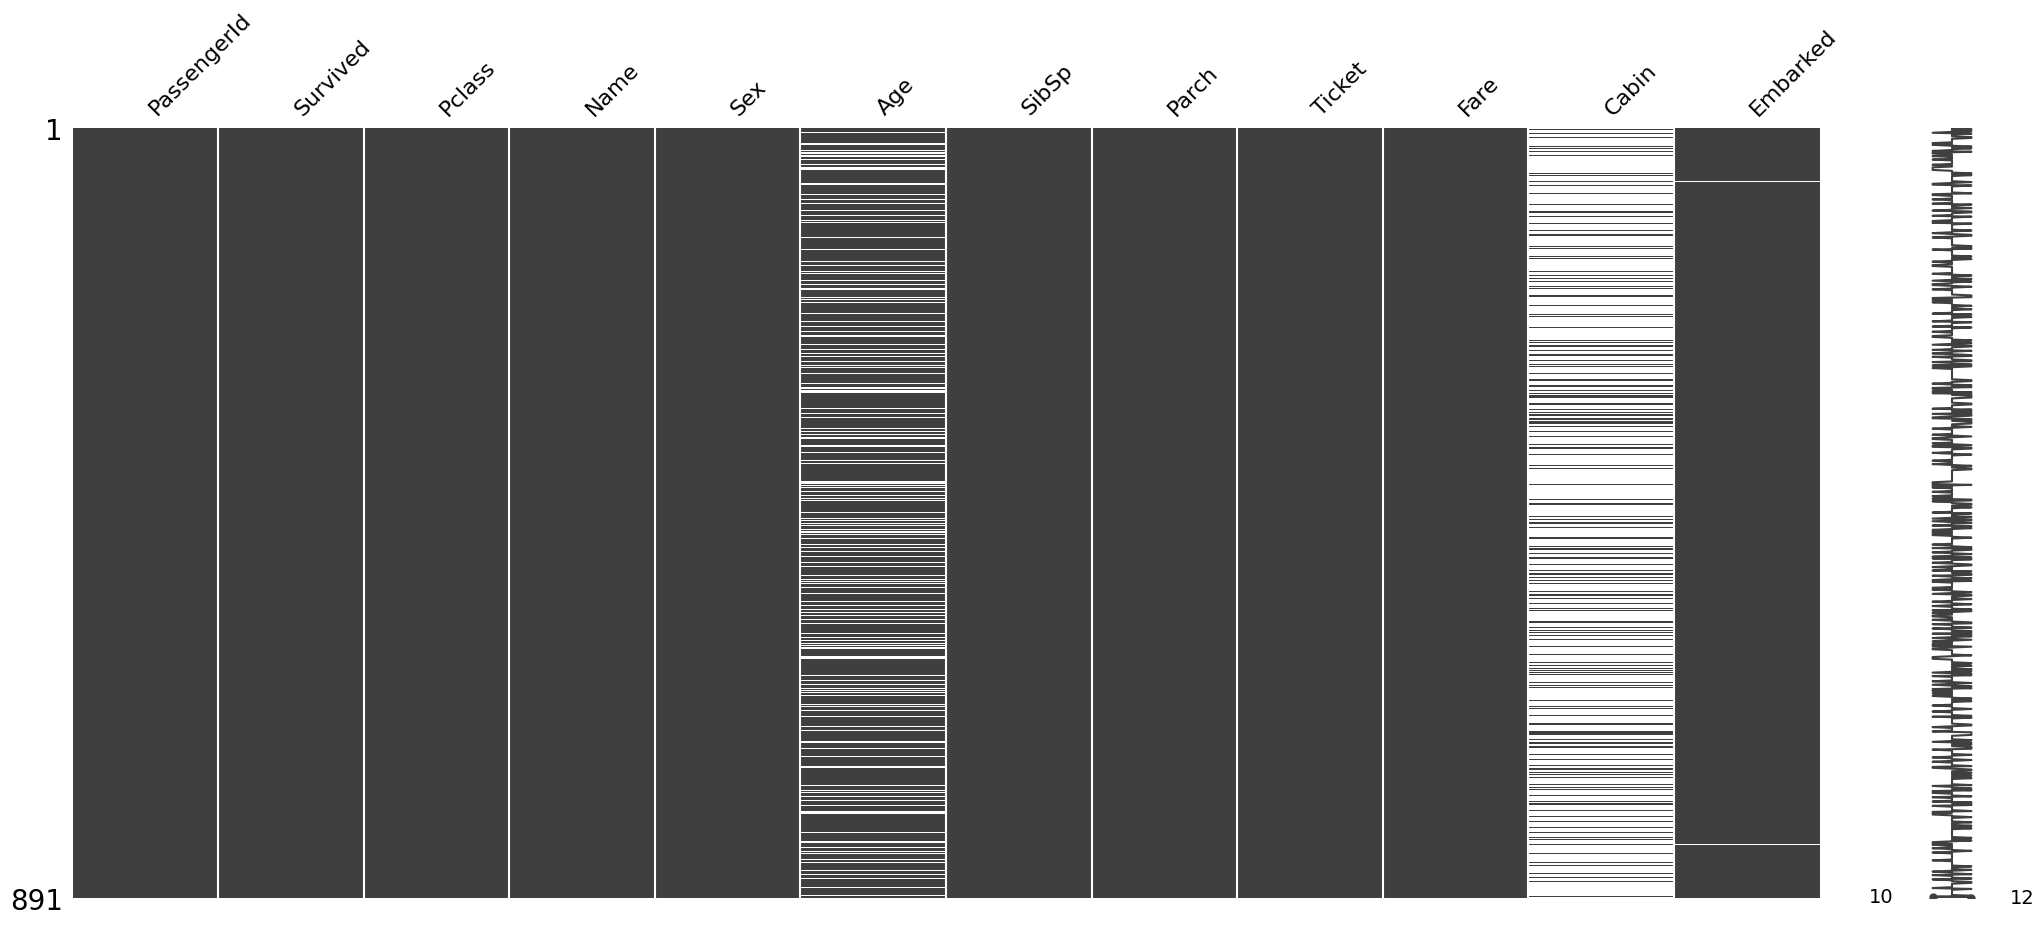

In [10]:
# Mostrar la distribucion de los datos en las columnas del data set
msno.matrix(data_titanic)

<Axes: >

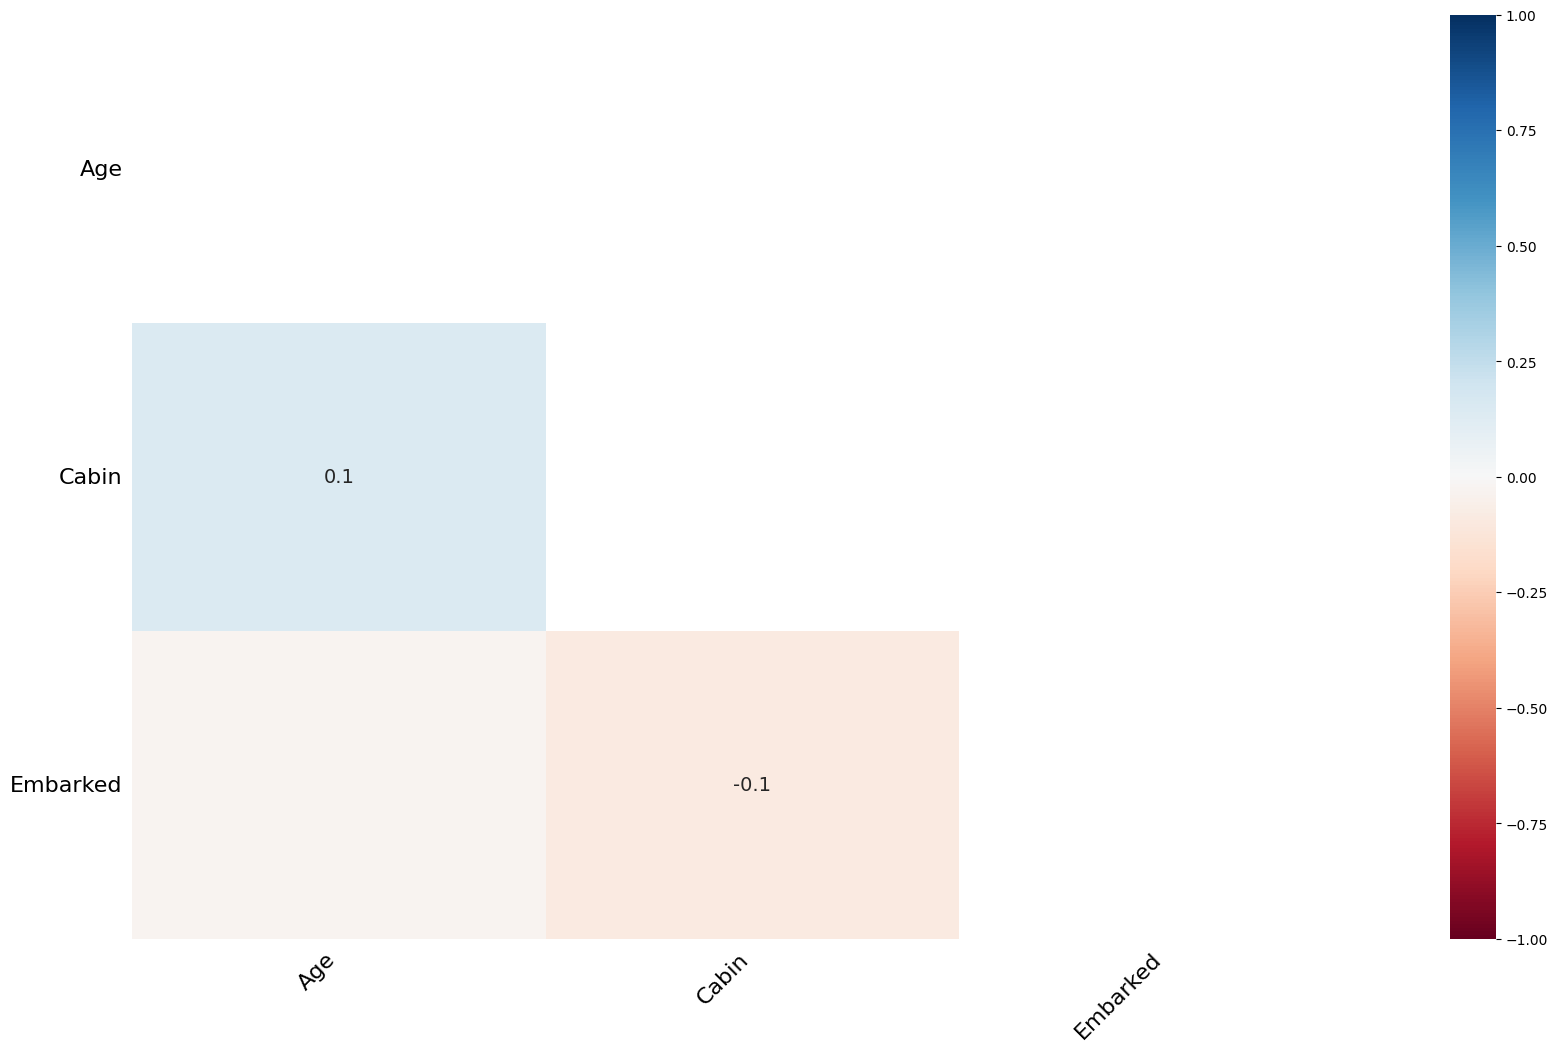

In [11]:
# Visualizar el mapa de calor que muestra la correlacion de los datos
msno.heatmap(data_titanic)

<Axes: >

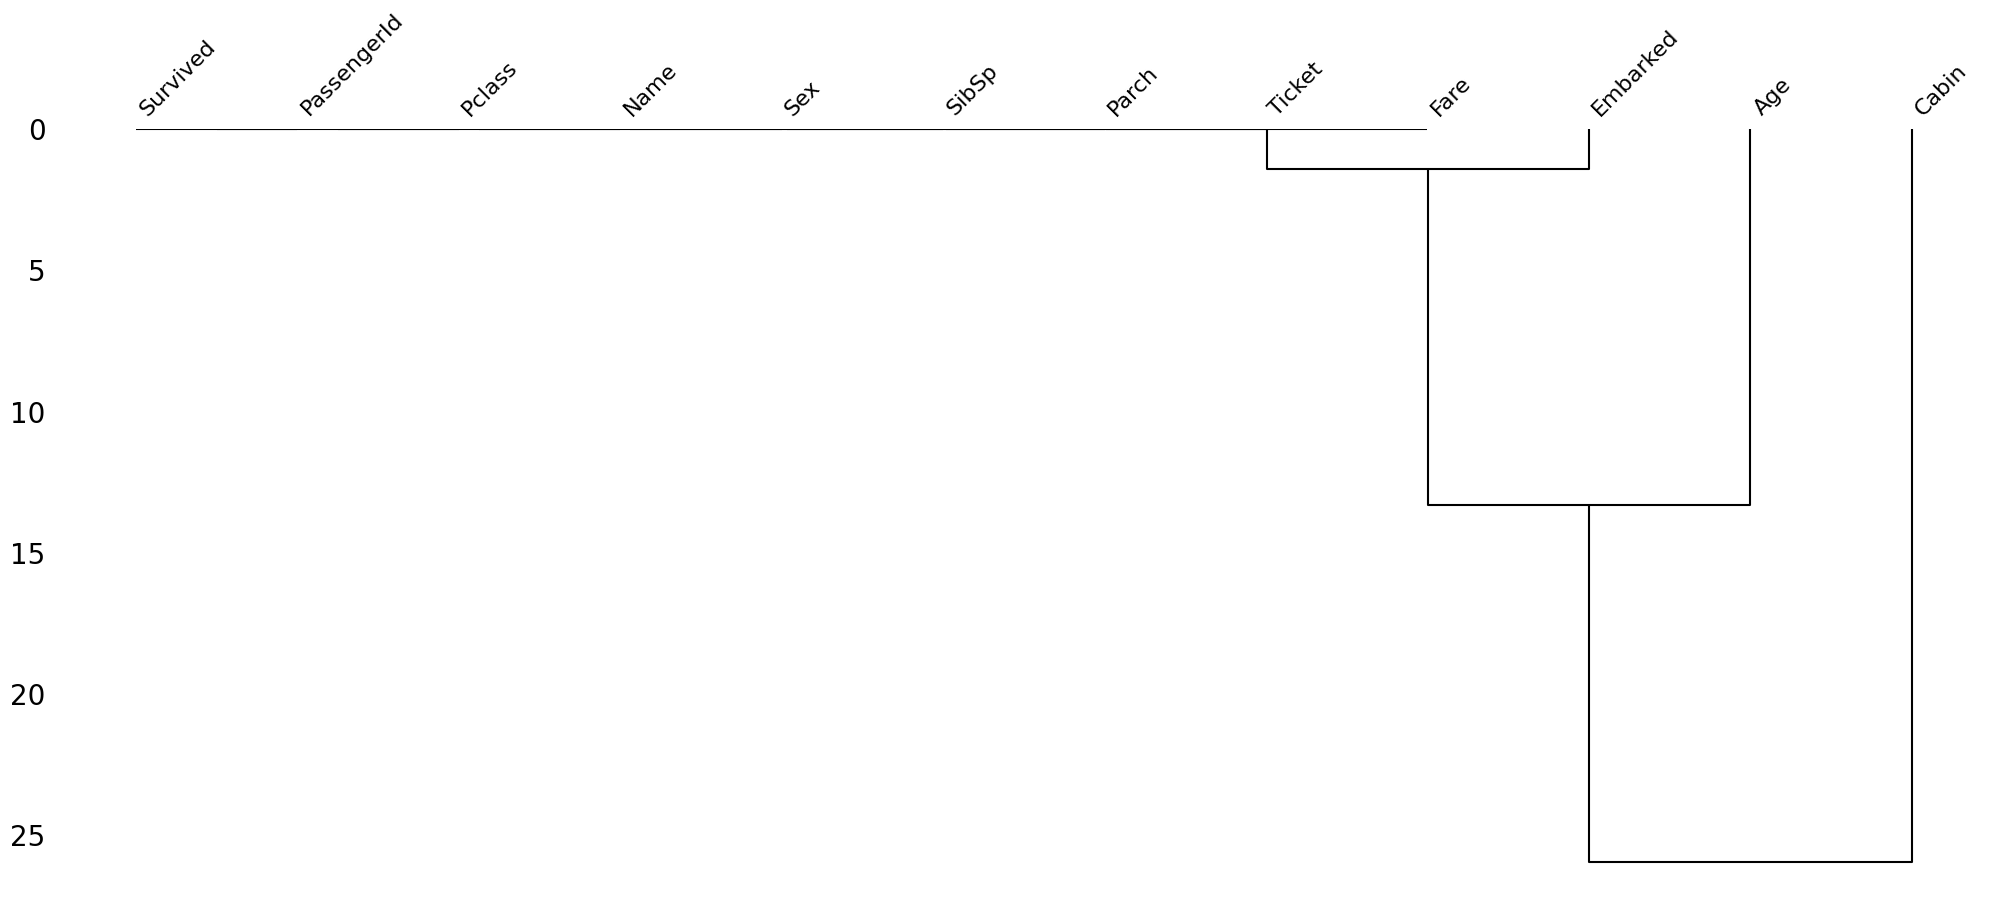

In [12]:
# Muestra la familia que pertenencen cada uno de las columnas de datos
msno.dendrogram(data_titanic)

In [13]:
# Mostrar la cantidad de valores nulos en las columnas
data_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# Mostrar la cantidad de valores nulos en las columnas
data_titanic.isnull().sum().sum()

np.int64(866)

**1. Grafica de sobrevivencia de pasajeros**

In [15]:
survived = data_titanic['Survived'].value_counts()
print(survived)
labels = ['Not Survived', 'Survived']
values = survived.values
print(values)

Survived
0    549
1    342
Name: count, dtype: int64
[549 342]


In [16]:
data = go.Pie(
    labels=labels,
    values=values,
    hole=0.6,
    name='Survival Status',
    marker=dict(colors=['#86B955', '#559AB9'], line=dict(width=4, color='#FFFFFF'))
)
layout = go.Layout(
    title='Survival Status',
    legend=dict(orientation='h')
)
fig=go.Figure(data=[data],layout=layout)
iplot(fig)

**Proporcione sus observaciones**

El 38.4 no sobrevivieron, mientras que el 61.6% no lo lograron

**2. Grafica de sobrevivientes y no sobrevivientes por grupos de edad**

In [17]:
surv=data_titanic.loc[data_titanic['Survived']==1]
no_surv=data_titanic.loc[data_titanic['Survived']==0]

In [18]:
trace1=go.Box(
    y=surv['Age'],
    name='Survived',
    marker=dict(color='#242992')
)

trace2=go.Box(
    y=no_surv['Age'],
    name='Not Survived',
    marker=dict(color='#343932')
)

layout=go.Layout(
    title = 'Survival by Group',
    xaxis=dict(title='Survival status'),
    yaxis=dict(title='Age')
)

fig=go.Figure(data=[trace1, trace2])
iplot(fig)

**Proporcione sus observaciones:**

El promedio de supervivientes y no sobrevivientes es el mismo

**3. Grafica de sobrevivencia por genero**

In [19]:
# Importar una libreria para crear dos graficas o mas subplots
from plotly.subplots import make_subplots

In [20]:
#Dividr el conjunto de datos por genero y su sobrevivencia
surv_gender=surv['Sex'].value_counts()
surv_gender

Sex
female    233
male      109
Name: count, dtype: int64

In [21]:
# Divir el conjunto de datos por genero y su sobrevivencia
n_surv_gender=no_surv['Sex'].value_counts()
n_surv_gender

Sex
male      468
female     81
Name: count, dtype: int64

In [22]:
# Graficar los datos obtenidos en surv_gender y n_srv_gender
fig = make_subplots(rows=1,cols=2,specs=[[{'type':'domain'},{'type':'domain'}]])

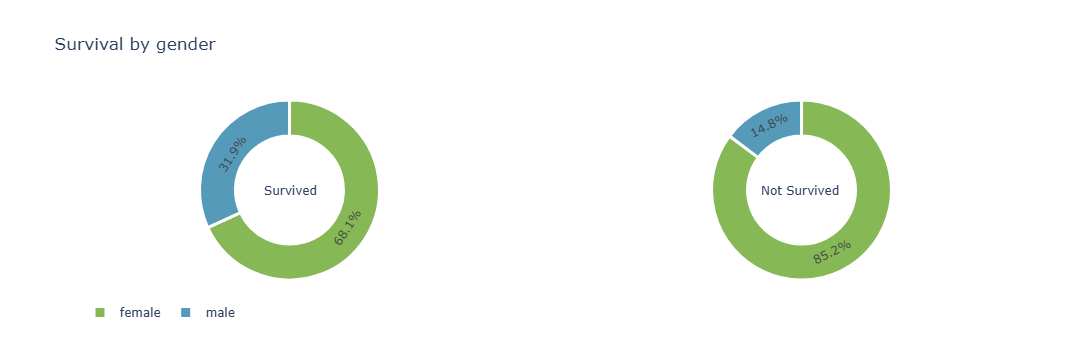

In [23]:
fig.add_trace(go.Pie(
    labels=surv_gender.index,
    values=surv_gender.values,
    name='Survived',
    marker=dict(colors=['#86B955', '#559AB9'])),1,1)

fig.add_trace(go.Pie(
    labels=n_surv_gender.index,
    values=n_surv_gender.values,
    name='Not Survived',
    marker=dict(colors=['#86B955', '#559AB9'])),1,2)

fig.update_traces(hole=0.6)
fig.data[0].marker.line.width=3
fig.data[1].marker.line.width=3

fig.data[0].marker.line.color='#FFFFFF'
fig.data[1].marker.line.color='#FFFFFF'

fig.update_layout(title_text='Survival by gender', legend=dict(orientation='h'),
                  annotations=[dict(text='Survived', showarrow=False, x=0.195),
                              dict(text='Not Survived', showarrow=False, x=0.817)])

fig.show()

**Proporcione sus observaciones**

Al graficar de esta manera, nos podemos dar cuenta de que las mujeres tienen el porcentaje mas alto en sobrevivencia y no sobrevivencia

**4. Grafica de sobrevivencia por clases**

In [24]:
pclass1=data_titanic.loc[data_titanic['Pclass']==1,:]
pclass2=data_titanic.loc[data_titanic['Pclass']==2,:]
pclass3=data_titanic.loc[data_titanic['Pclass']==3,:]

In [26]:
# Reemplaza el estado de supervivencia con valores mas significativos
pclass1['Survived'].replace({0:'Not Survived',1:'Survived'}, inplace=True)
pclass2['Survived'].replace({0:'Not Survived',1:'Survived'}, inplace=True)
pclass3['Survived'].replace({0:'Not Survived',1:'Survived'}, inplace=True)